In [24]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

In [25]:
# maze array
maze = [
    [0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
    [1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0],
    [1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0],
    [1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
]

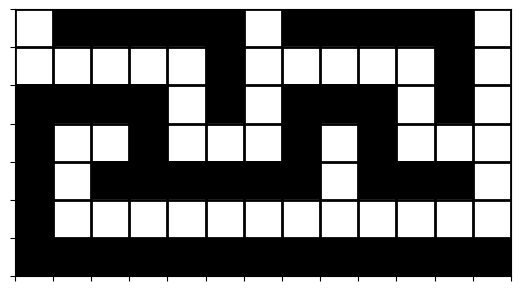

In [26]:
# Convert the maze to a NumPy array for easier plotting
maze_np = np.array(maze)

# Create a figure and axis for plotting
fig, ax = plt.subplots()
ax.imshow(maze_np, cmap='binary', interpolation='nearest')

# Draw gridlines
ax.grid(which='major', color='black', linestyle='-', linewidth=2)

# Set the ticks to correspond to the grid
ax.set_xticks(np.arange(-0.5, len(maze[0]), 1))
ax.set_yticks(np.arange(-0.5, len(maze), 1))

# Remove tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.show()

In [27]:
#Breadth First Search Algorithm
def bfs(maze, start, end, maze_with_path):
    queue = [start]
    visited = set([start])
    predecessors = {start: None}  # Track the predecessor of each cell

    while queue:
        current = queue.pop(0)
        if current != start and current != end:  # Avoid marking the start and end points
            maze_with_path[current[0]][current[1]] = 3  # Mark as visited for visualization

        if current == end:
            path = []
            while current is not None:  # Reconstruct the path from end to start
                path.append(current)
                current = predecessors[current]
            return path[::-1], maze_with_path  # Return the path in start to end order along with the marked maze

        for direction in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            next_row = current[0] + direction[0]
            next_col = current[1] + direction[1]

            if 0 <= next_row < len(maze) and 0 <= next_col < len(maze[0]):
                next_cell = (next_row, next_col)

                if maze[next_cell[0]][next_cell[1]] == 0 and next_cell not in visited:
                    queue.append(next_cell)
                    visited.add(next_cell)
                    predecessors[next_cell] = current  # Set current as predecessor of next_cell

    return [], maze_with_path  # Return an empty list if no path is found along with the marked maze


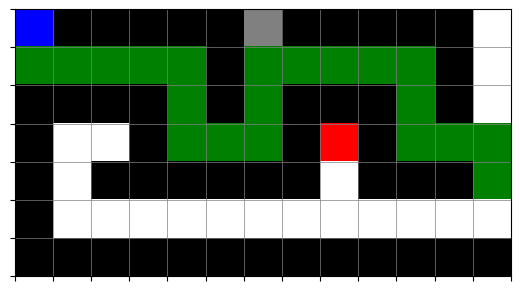

In [28]:
# Start and end points
start, end = (0, 0), (3, 8)


# Assuming the 'path' and 'maze_with_path' variables are defined as before
# Copy the maze to a new array for visualization if needed
maze_with_path = np.array(maze)

# Find the path and mark the visited cells in the maze_with_path
path, maze_with_path = bfs(maze, start=(0, 0), end=(4, 12), maze_with_path=maze_with_path)

# Mark the path in the maze
for row, col in path:
    maze_with_path[row][col] = 2  # Marking the path with '2'

# Mark start and end points
maze_with_path[start[0]][start[1]] = 4  # Start
maze_with_path[end[0]][end[1]] = 5  # End

# Create a custom color map
# 0: white (unused cells), 1: black (walls), 2: green (path), 3: red (visited but not part of the final path)
cmap = ListedColormap(['white', 'black', 'green', 'gray', 'blue', 'red'])

# Plotting
fig, ax = plt.subplots()
ax.imshow(maze_with_path, cmap=cmap, interpolation='nearest', norm=plt.Normalize(vmin=0, vmax=5))
ax.grid(which='major', color='grey', linestyle='-', linewidth=0.5)
ax.set_xticks(np.arange(-0.5, len(maze[0]), 1))
ax.set_yticks(np.arange(-0.5, len(maze), 1))
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.show()
